In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import config  

# Load your data
X = np.load('./X_reference.npy')  
y = np.load('./y_reference.npy')
wavenumbers = np.load('wavenumbers.npy')

# Get the unique species labels from the config file
species_labels = [config.STRAINS[i] for i in sorted(config.STRAINS.keys())]


Species ordered by average deviation from the mean spectrum:
Species: Group B Strep. - Average Deviation: 11.22
Species: MSSA 2 - Average Deviation: 9.25
Species: P. aeruginosa 2 - Average Deviation: 5.37
Species: C. glabrata - Average Deviation: 5.02
Species: MSSA 3 - Average Deviation: 4.48
Species: P. mirabilis - Average Deviation: 4.46
Species: MRSA 1 (isogenic) - Average Deviation: 4.38
Species: MRSA 2 - Average Deviation: 4.37
Species: S. pneumoniae 1 - Average Deviation: 4.33
Species: E. cloacae - Average Deviation: 4.16
Species: E. faecalis 2 - Average Deviation: 4.16
Species: Group G Strep. - Average Deviation: 4.14
Species: S. pneumoniae 2 - Average Deviation: 4.13
Species: MSSA 1 - Average Deviation: 4.08
Species: S. marcescens - Average Deviation: 4.08
Species: P. aeruginosa 1 - Average Deviation: 3.96
Species: S. enterica - Average Deviation: 3.81
Species: K. pneumoniae 2 - Average Deviation: 3.81
Species: E. faecalis 1 - Average Deviation: 3.79
Species: Group C Strep. - A

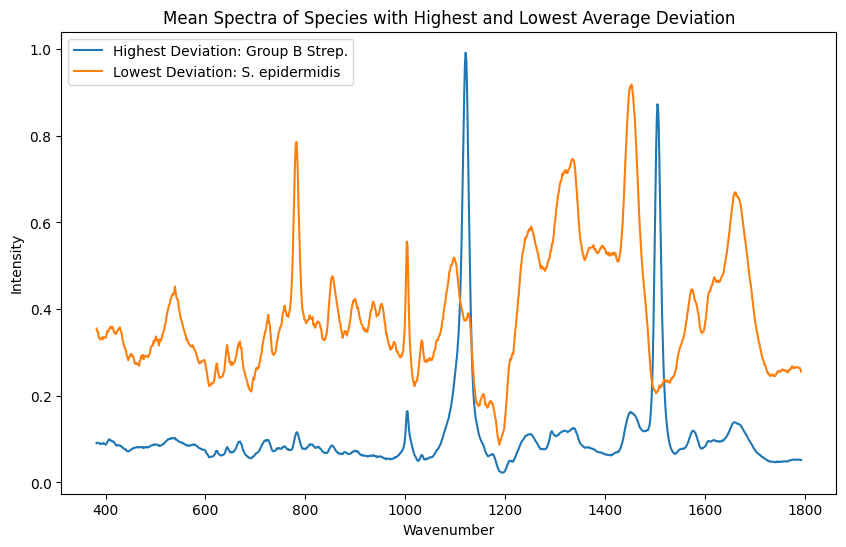

In [4]:


# Get the unique species labels from the config file
species_labels = [config.STRAINS[i] for i in sorted(config.STRAINS.keys())]

# Calculate the mean spectrum
mean_spectrum = np.mean(X, axis=0)

# Function to calculate deviation from the mean spectrum
def calculate_deviation(spectrum, mean_spectrum):
    return np.linalg.norm(spectrum - mean_spectrum)

# Calculate deviation for each spectrum
deviations = np.array([calculate_deviation(spectrum, mean_spectrum) for spectrum in X])

# Group the deviations by species
species_deviation_dict = {}
for i, label in enumerate(y):
    label = int(label)  # Ensure label is an integer
    if label not in species_deviation_dict:
        species_deviation_dict[label] = []
    species_deviation_dict[label].append(deviations[i])

# Calculate the average deviation for each species
species_avg_deviation = {label: np.mean(deviation_list) for label, deviation_list in species_deviation_dict.items()}

# Sort species by their average deviation
sorted_species_by_deviation = sorted(species_avg_deviation.items(), key=lambda item: item[1], reverse=True)

# Print the species sorted by average deviation
print("Species ordered by average deviation from the mean spectrum:")
for label, avg_deviation in sorted_species_by_deviation:
    print(f"Species: {species_labels[label]} - Average Deviation: {avg_deviation:.2f}")

# Optionally plot the mean spectra of the species with the highest and lowest average deviations
plt.figure(figsize=(10, 6))

# Get the species with the highest and lowest average deviations
highest_deviation_species = sorted_species_by_deviation[0][0]
lowest_deviation_species = sorted_species_by_deviation[-1][0]

# Plot the mean spectrum for the species with the highest deviation
mean_spectrum_high = np.mean(X[y == highest_deviation_species], axis=0)
plt.plot(wavenumbers, mean_spectrum_high, label=f"Highest Deviation: {species_labels[highest_deviation_species]}")

# Plot the mean spectrum for the species with the lowest deviation
mean_spectrum_low = np.mean(X[y == lowest_deviation_species], axis=0)
plt.plot(wavenumbers, mean_spectrum_low, label=f"Lowest Deviation: {species_labels[lowest_deviation_species]}")

plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.legend()
plt.title('Mean Spectra of Species with Highest and Lowest Average Deviation')
plt.show()


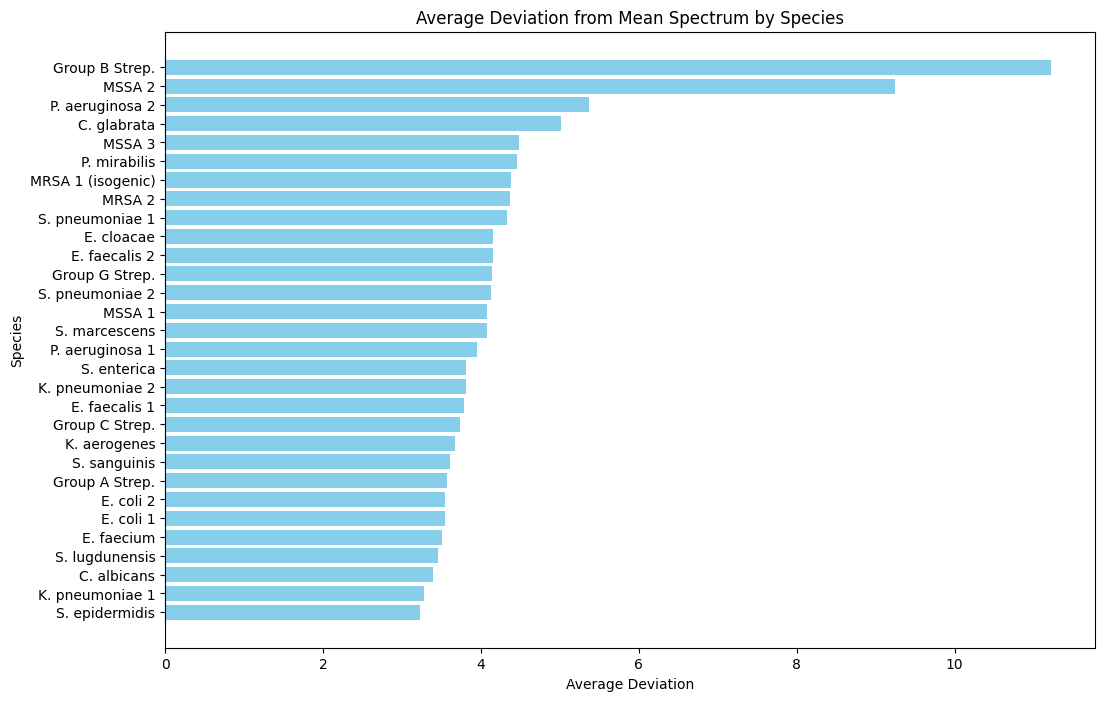

In [6]:



species_labels = [config.STRAINS[i] for i in sorted(config.STRAINS.keys())]

# Calculate the mean spectrum
mean_spectrum = np.mean(X, axis=0)

# Function to calculate deviation from the mean spectrum
def calculate_deviation(spectrum, mean_spectrum):
    return np.linalg.norm(spectrum - mean_spectrum)

# Calculate deviation for each spectrum
deviations = np.array([calculate_deviation(spectrum, mean_spectrum) for spectrum in X])

# Group the deviations by species
species_deviation_dict = {}
for i, label in enumerate(y):
    label = int(label)  
    if label not in species_deviation_dict:
        species_deviation_dict[label] = []
    species_deviation_dict[label].append(deviations[i])

# Calculate the average deviation for each species
species_avg_deviation = {label: np.mean(deviation_list) for label, deviation_list in species_deviation_dict.items()}

# Sort species by their average deviation
sorted_species_by_deviation = sorted(species_avg_deviation.items(), key=lambda item: item[1], reverse=True)

# Prepare data for plotting
species_names = [species_labels[label] for label, _ in sorted_species_by_deviation]
average_deviations = [avg_deviation for _, avg_deviation in sorted_species_by_deviation]

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(species_names, average_deviations, color='skyblue')
plt.xlabel('Average Deviation')
plt.ylabel('Species')
plt.title('Average Deviation from Mean Spectrum by Species')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest deviation on top
plt.show()


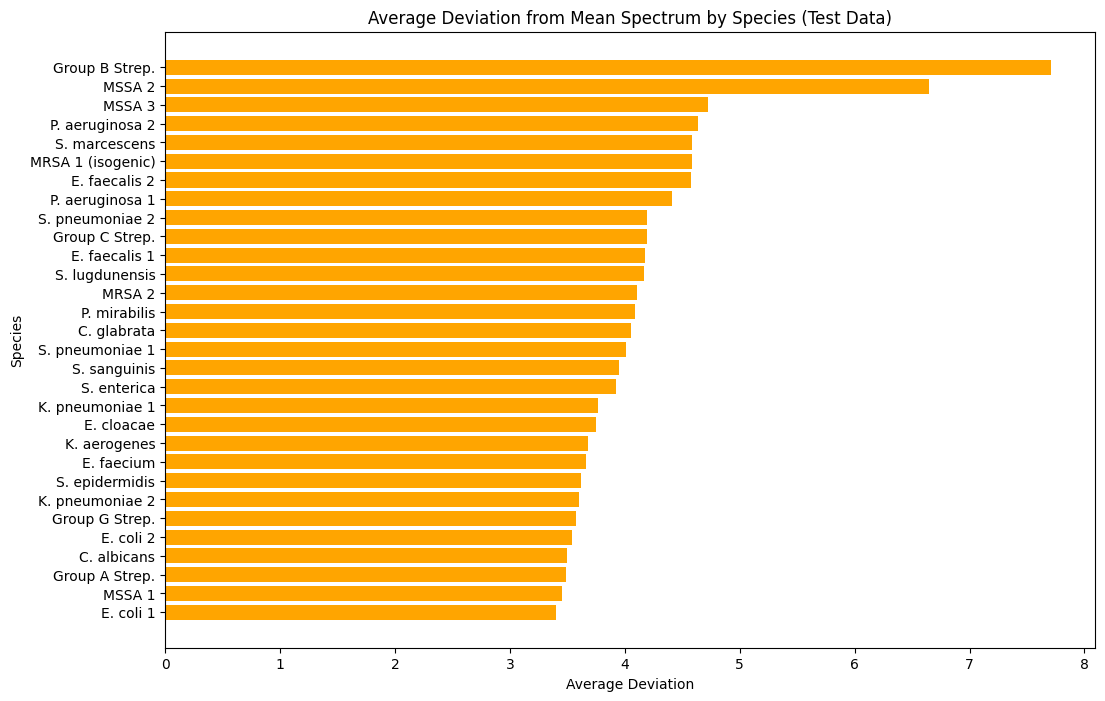

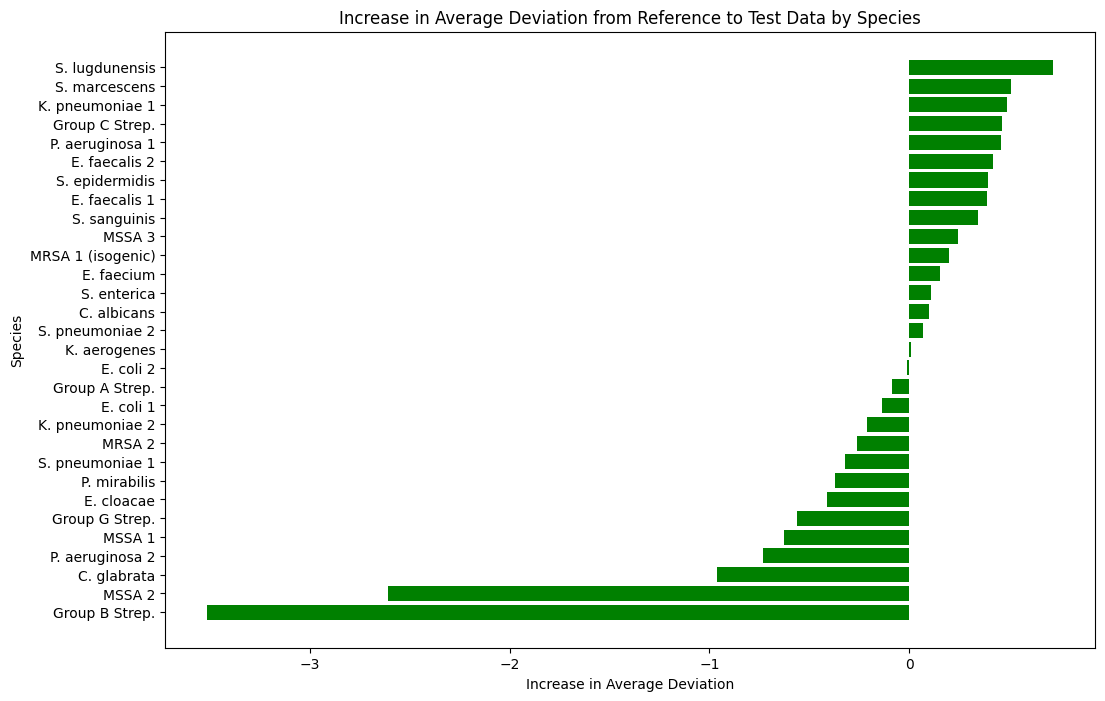

Species with the biggest increase in average deviation:
Species: S. lugdunensis - Increase in Deviation: 0.72
Species: S. marcescens - Increase in Deviation: 0.51
Species: K. pneumoniae 1 - Increase in Deviation: 0.49
Species: Group C Strep. - Increase in Deviation: 0.46
Species: P. aeruginosa 1 - Increase in Deviation: 0.46
Species: E. faecalis 2 - Increase in Deviation: 0.42
Species: S. epidermidis - Increase in Deviation: 0.39
Species: E. faecalis 1 - Increase in Deviation: 0.39
Species: S. sanguinis - Increase in Deviation: 0.34
Species: MSSA 3 - Increase in Deviation: 0.24
Species: MRSA 1 (isogenic) - Increase in Deviation: 0.20
Species: E. faecium - Increase in Deviation: 0.15
Species: S. enterica - Increase in Deviation: 0.11
Species: C. albicans - Increase in Deviation: 0.10
Species: S. pneumoniae 2 - Increase in Deviation: 0.07
Species: K. aerogenes - Increase in Deviation: 0.01
Species: E. coli 2 - Increase in Deviation: -0.01
Species: Group A Strep. - Increase in Deviation: 

In [7]:


# Get the unique species labels from the config file
species_labels = [config.STRAINS[i] for i in sorted(config.STRAINS.keys())]

# Calculate the mean spectrum from the reference data
mean_spectrum_ref = np.mean(X_ref, axis=0)

# Function to calculate deviation from the mean spectrum
def calculate_deviation(spectrum, mean_spectrum):
    return np.linalg.norm(spectrum - mean_spectrum)

# Calculate deviation for each spectrum in reference and test datasets
deviations_ref = np.array([calculate_deviation(spectrum, mean_spectrum_ref) for spectrum in X_ref])
deviations_test = np.array([calculate_deviation(spectrum, mean_spectrum_ref) for spectrum in X_test])

# Group the deviations by species for reference data
species_deviation_dict_ref = {}
for i, label in enumerate(y_ref):
    label = int(label)  # Ensure label is an integer
    if label not in species_deviation_dict_ref:
        species_deviation_dict_ref[label] = []
    species_deviation_dict_ref[label].append(deviations_ref[i])

# Group the deviations by species for test data
species_deviation_dict_test = {}
for i, label in enumerate(y_test):
    label = int(label)  # Ensure label is an integer
    if label not in species_deviation_dict_test:
        species_deviation_dict_test[label] = []
    species_deviation_dict_test[label].append(deviations_test[i])

# Calculate the average deviation for each species in both datasets
species_avg_deviation_ref = {label: np.mean(deviation_list) for label, deviation_list in species_deviation_dict_ref.items()}
species_avg_deviation_test = {label: np.mean(deviation_list) for label, deviation_list in species_deviation_dict_test.items()}

# Calculate the increase in average deviation between test and reference datasets
species_deviation_increase = {label: species_avg_deviation_test[label] - species_avg_deviation_ref.get(label, 0) 
                              for label in species_avg_deviation_test}

# Sort species by their average deviation in test data
sorted_species_by_deviation_test = sorted(species_avg_deviation_test.items(), key=lambda item: item[1], reverse=True)

# Sort species by their increase in deviation
sorted_species_by_increase = sorted(species_deviation_increase.items(), key=lambda item: item[1], reverse=True)

# Plot the average deviation for test data
species_names_test = [species_labels[label] for label, _ in sorted_species_by_deviation_test]
average_deviations_test = [avg_deviation for _, avg_deviation in sorted_species_by_deviation_test]

plt.figure(figsize=(12, 8))
plt.barh(species_names_test, average_deviations_test, color='orange')
plt.xlabel('Average Deviation')
plt.ylabel('Species')
plt.title('Average Deviation from Mean Spectrum by Species (Test Data)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest deviation on top
plt.show()

# Plot the increase in average deviation between test and reference data
species_names_increase = [species_labels[label] for label, _ in sorted_species_by_increase]
deviation_increase = [increase for _, increase in sorted_species_by_increase]

plt.figure(figsize=(12, 8))
plt.barh(species_names_increase, deviation_increase, color='green')
plt.xlabel('Increase in Average Deviation')
plt.ylabel('Species')
plt.title('Increase in Average Deviation from Reference to Test Data by Species')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest increase on top
plt.show()

# Print out the species with the biggest increase in deviation
print("Species with the biggest increase in average deviation:")
for label, increase in sorted_species_by_increase:
    print(f"Species: {species_labels[label]} - Increase in Deviation: {increase:.2f}")


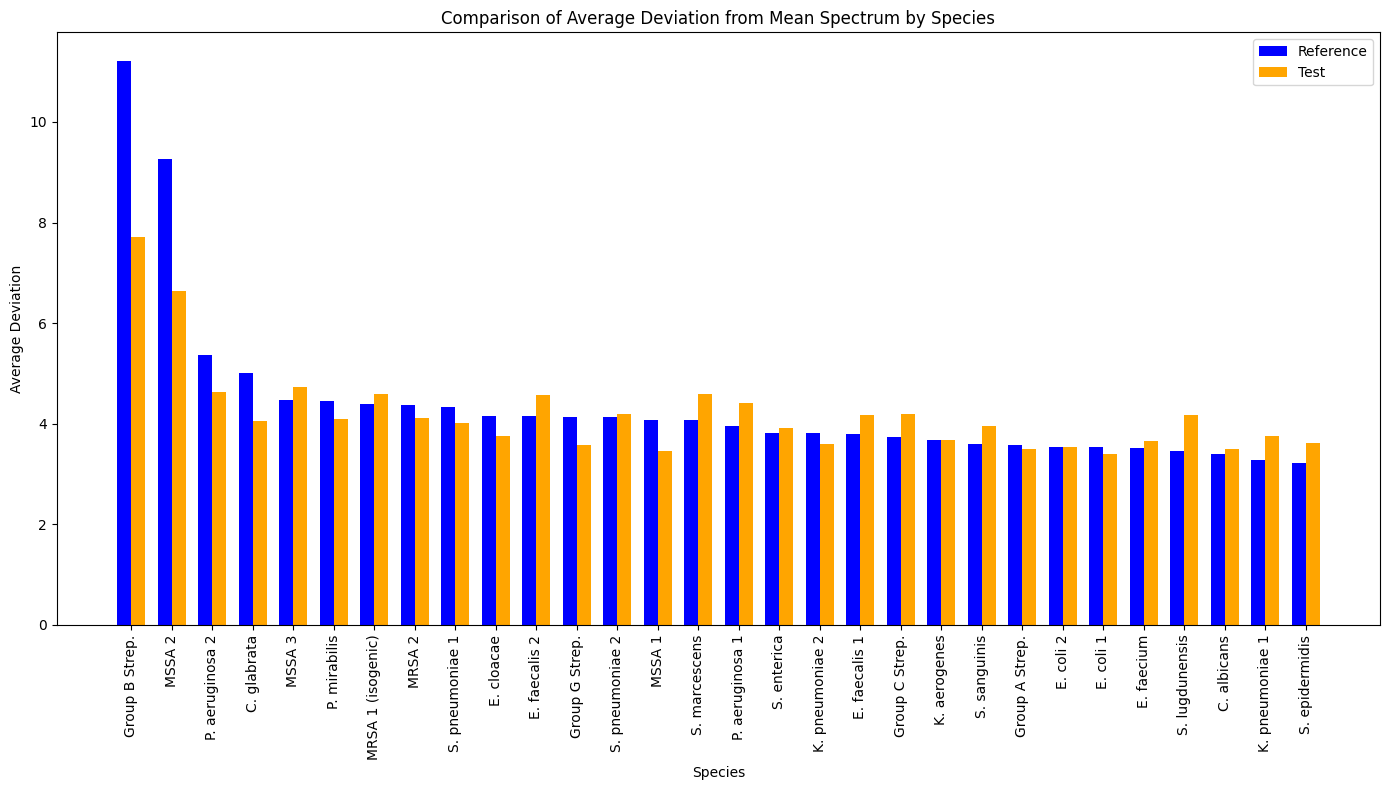

In [10]:

# Get the unique species labels from the config file
species_labels = [config.STRAINS[i] for i in sorted(config.STRAINS.keys())]

# Calculate the mean spectrum from the reference data
mean_spectrum_ref = np.mean(X_ref, axis=0)

# Function to calculate deviation from the mean spectrum
def calculate_deviation(spectrum, mean_spectrum):
    return np.linalg.norm(spectrum - mean_spectrum)

# Calculate deviation for each spectrum in reference and test datasets
deviations_ref = np.array([calculate_deviation(spectrum, mean_spectrum_ref) for spectrum in X_ref])
deviations_test = np.array([calculate_deviation(spectrum, mean_spectrum_ref) for spectrum in X_test])

# Group the deviations by species for reference data
species_deviation_dict_ref = {}
for i, label in enumerate(y_ref):
    label = int(label)  # Ensure label is an integer
    if label not in species_deviation_dict_ref:
        species_deviation_dict_ref[label] = []
    species_deviation_dict_ref[label].append(deviations_ref[i])

# Group the deviations by species for test data
species_deviation_dict_test = {}
for i, label in enumerate(y_test):
    label = int(label)  # Ensure label is an integer
    if label not in species_deviation_dict_test:
        species_deviation_dict_test[label] = []
    species_deviation_dict_test[label].append(deviations_test[i])

# Calculate the average deviation for each species in both datasets
species_avg_deviation_ref = {label: np.mean(deviation_list) for label, deviation_list in species_deviation_dict_ref.items()}
species_avg_deviation_test = {label: np.mean(deviation_list) for label, deviation_list in species_deviation_dict_test.items()}

# Sort species by their average deviation in reference data
sorted_species_by_deviation = sorted(species_avg_deviation_ref.items(), key=lambda item: item[1], reverse=True)

# Prepare data for plotting
sorted_labels = [label for label, _ in sorted_species_by_deviation]
species_names = [species_labels[label] for label in sorted_labels]
average_deviations_ref = [species_avg_deviation_ref[label] for label in sorted_labels]
average_deviations_test = [species_avg_deviation_test.get(label, 0) for label in sorted_labels]

# Plot the average deviations for reference and test data side by side
x = np.arange(len(species_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, average_deviations_ref, width, label='Reference', color='blue')
rects2 = ax.bar(x + width/2, average_deviations_test, width, label='Test', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Deviation')
ax.set_xlabel('Species')
ax.set_title('Comparison of Average Deviation from Mean Spectrum by Species')
ax.set_xticks(x)
ax.set_xticklabels(species_names, rotation=90)
ax.legend()

fig.tight_layout()

plt.show()


In [5]:
mean_spectra = []

# Loop through each species index in the config file
for species_index in sorted(config.STRAINS.keys()):
    # Select the spectra corresponding to the current species
    species_spectra = X[y == species_index]
    
    # Calculate the mean spectrum for the current species
    mean_spectrum = np.mean(species_spectra, axis=0)
    mean_spectra.append(mean_spectrum)

# Convert to a numpy array for easier manipulation
mean_spectra = np.array(mean_spectra)


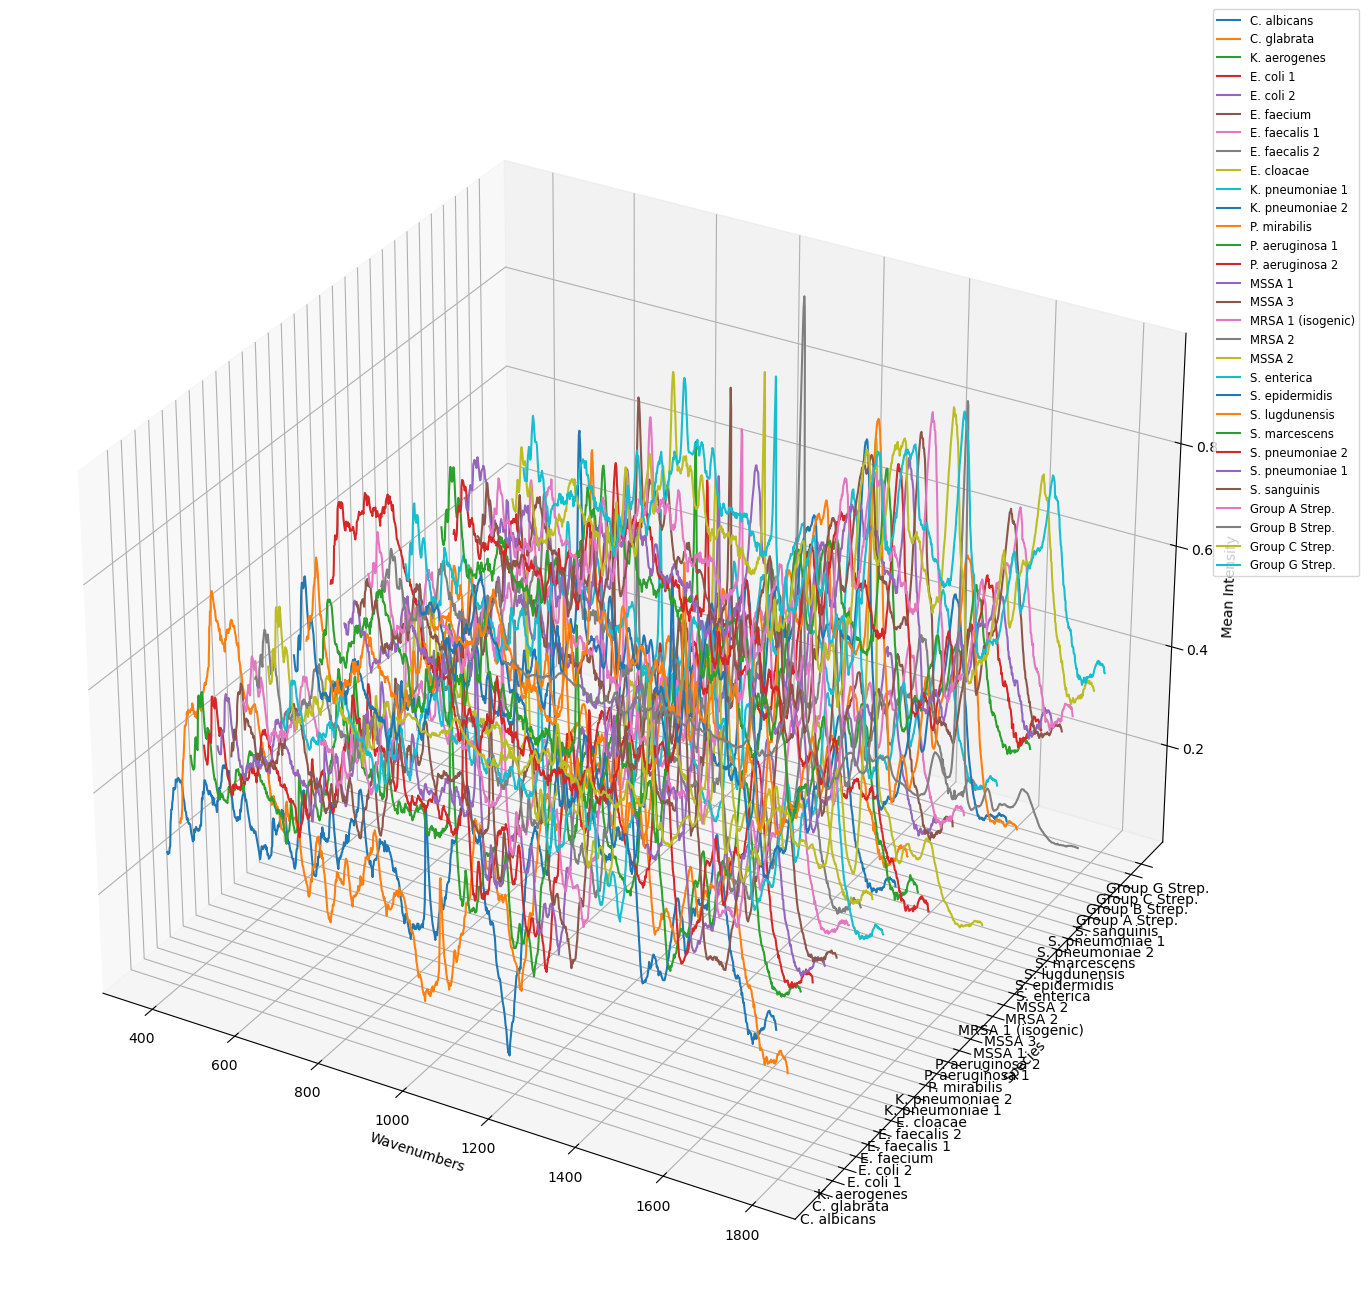

In [9]:
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111, projection='3d')

# Prepare the X, Y, Z values for the plot
X_plot, Y_plot = np.meshgrid(wavenumbers, range(len(species_labels)))
Z_plot = mean_spectra

# Plot each species' mean spectrum
for i in range(len(species_labels)):
    ax.plot(wavenumbers, [i] * len(wavenumbers), Z_plot[i, :], label=species_labels[i])

# Label axes
ax.set_xlabel('Wavenumbers')
ax.set_ylabel('Species')
ax.set_zlabel('Mean Intensity')

# Set y-axis ticks and labels
ax.set_yticks(range(len(species_labels)))
ax.set_yticklabels(species_labels)

# Optional: Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05), fontsize='small')

plt.show()


AttributeError: 'YAxis' object has no attribute 'tick_right'

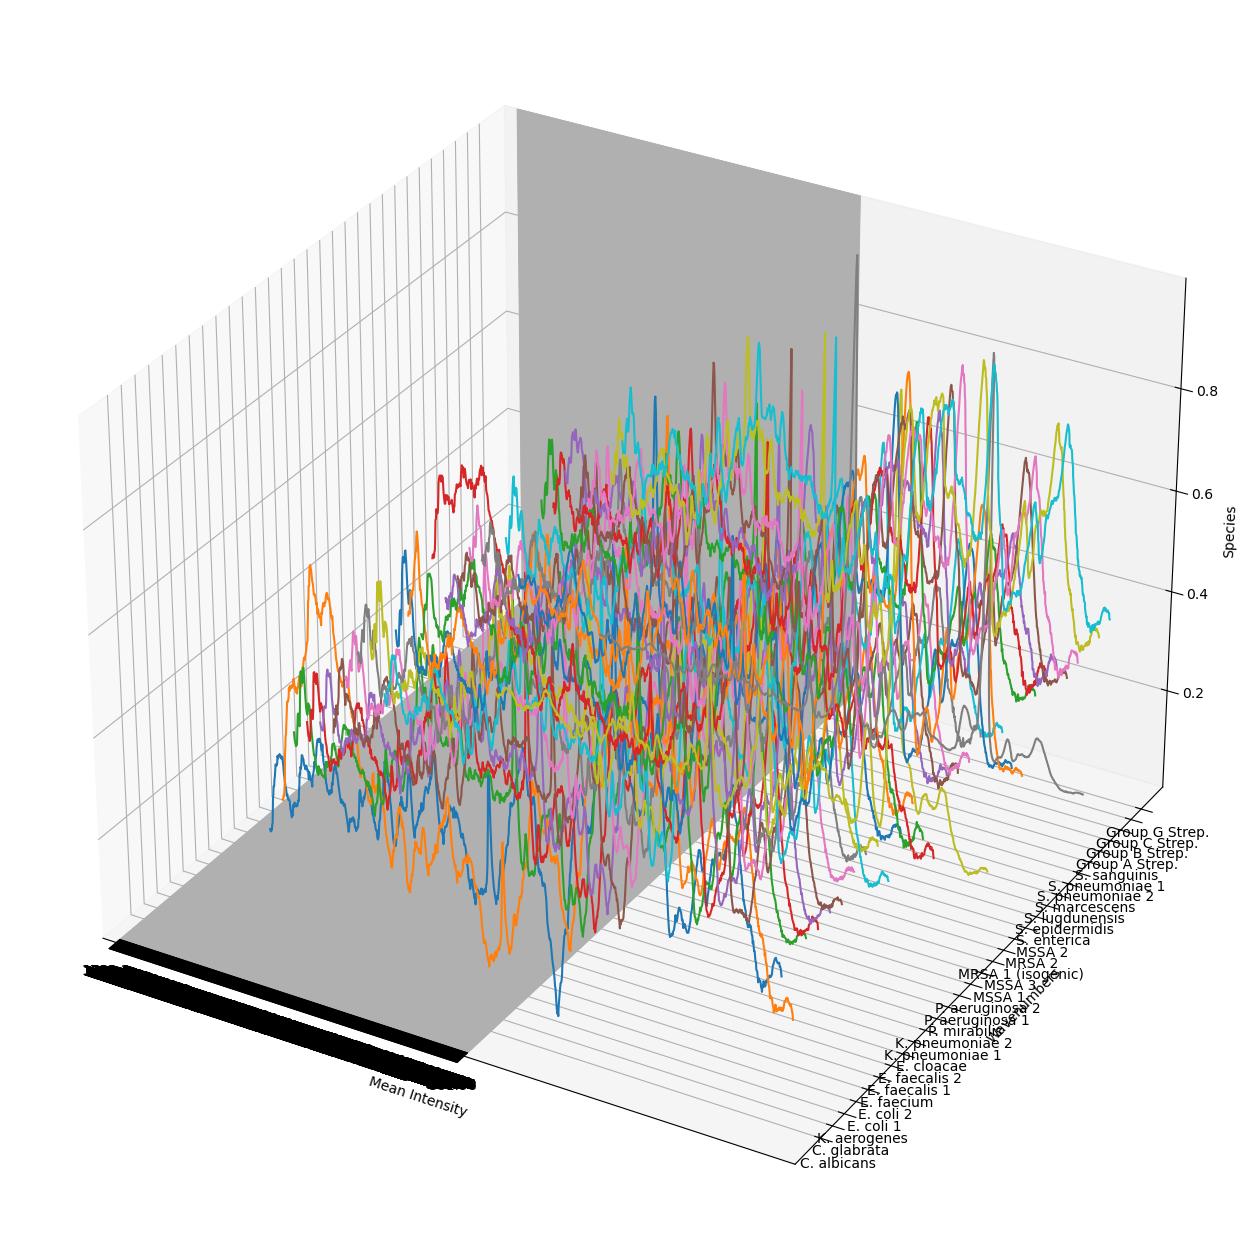

In [15]:
import matplotlib.pyplot as plt
import numpy as np



fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111, projection='3d')

# Prepare the X, Y, Z values for the plot
X_plot, Y_plot = np.meshgrid(wavenumbers, range(len(species_labels)))
Z_plot = mean_spectra

# Plot each species' mean spectrum
for i in range(len(species_labels)):
    ax.plot(wavenumbers, [i] * len(wavenumbers), Z_plot[i, :], label=species_labels[i])

# Label axes
ax.set_xlabel('Mean Intensity')
ax.set_ylabel('Wavenumbers')
ax.set_zlabel('Species')

# Set x-axis ticks and labels
ax.set_xticks(range(len(wavenumbers)))
ax.set_xticklabels(wavenumbers)

# Set y-axis ticks and labels
ax.set_yticks(range(len(species_labels)))
ax.set_yticklabels(species_labels)

# Move wavenumbers to the right-hand side
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

# Invert y-axis to have species labels on the left-hand side
ax.invert_yaxis()

# Optional: Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05), fontsize='small')

plt.show()




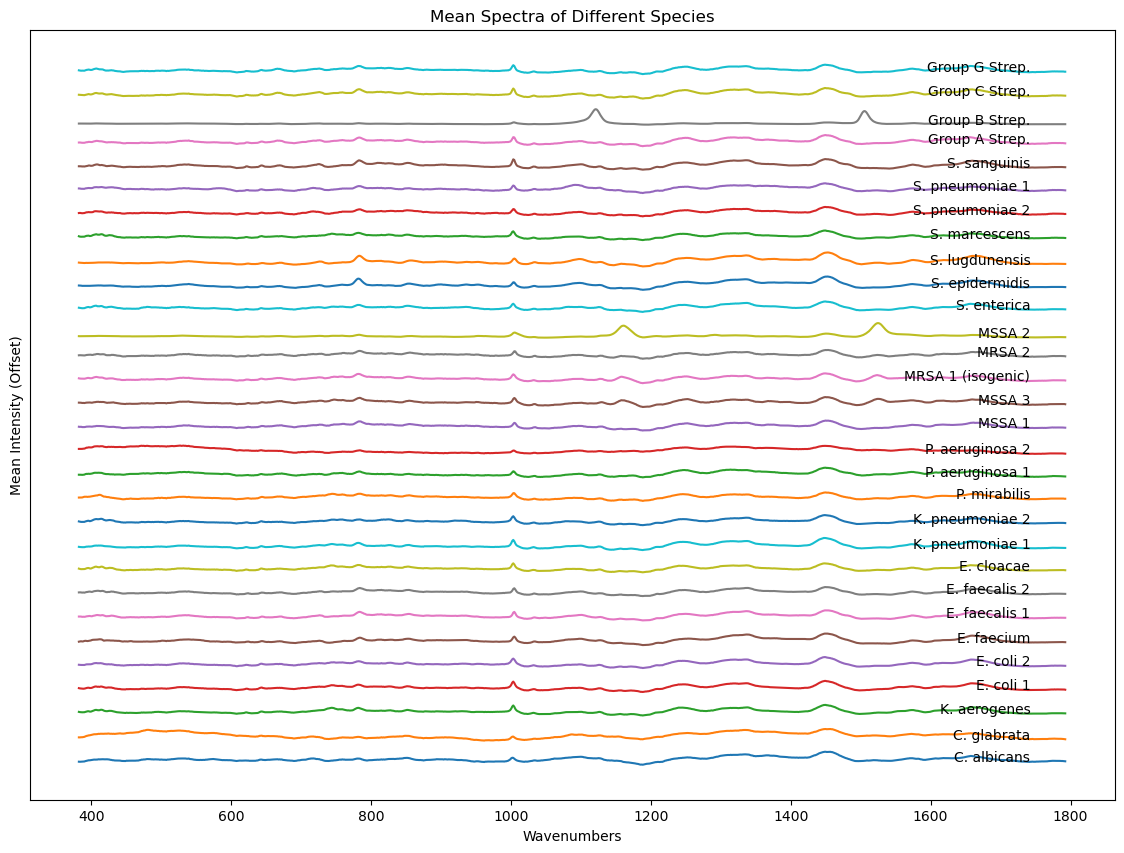

In [27]:

plt.figure(figsize=(14, 10))

# Increase this multiplier to add more space between the spectra
offset_multiplier = 1.5

# Plot each species' mean spectrum one on top of the other
for i in range(len(species_labels)):
    plt.plot(wavenumbers, mean_spectra[i, :] + i * offset_multiplier * np.max(mean_spectra), label=species_labels[i])

# Label axes
plt.xlabel('Wavenumbers')
plt.ylabel('Mean Intensity (Offset)')

# Set y-axis ticks and labels
plt.yticks([])  # Hide y-axis ticks since we're offsetting the spectra

# Add species labels to the left of each spectrum
for i, label in enumerate(species_labels):
    plt.text(wavenumbers[0] - 50, mean_spectra[i, 0] + i * offset_multiplier * np.max(mean_spectra), label, fontsize=10, ha='right')

# Optional: Add a legend
# plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05), fontsize='small')

plt.title('Mean Spectra of Different Species')
plt.savefig('mean_spectra.png', format='png', dpi=300) 
plt.show()

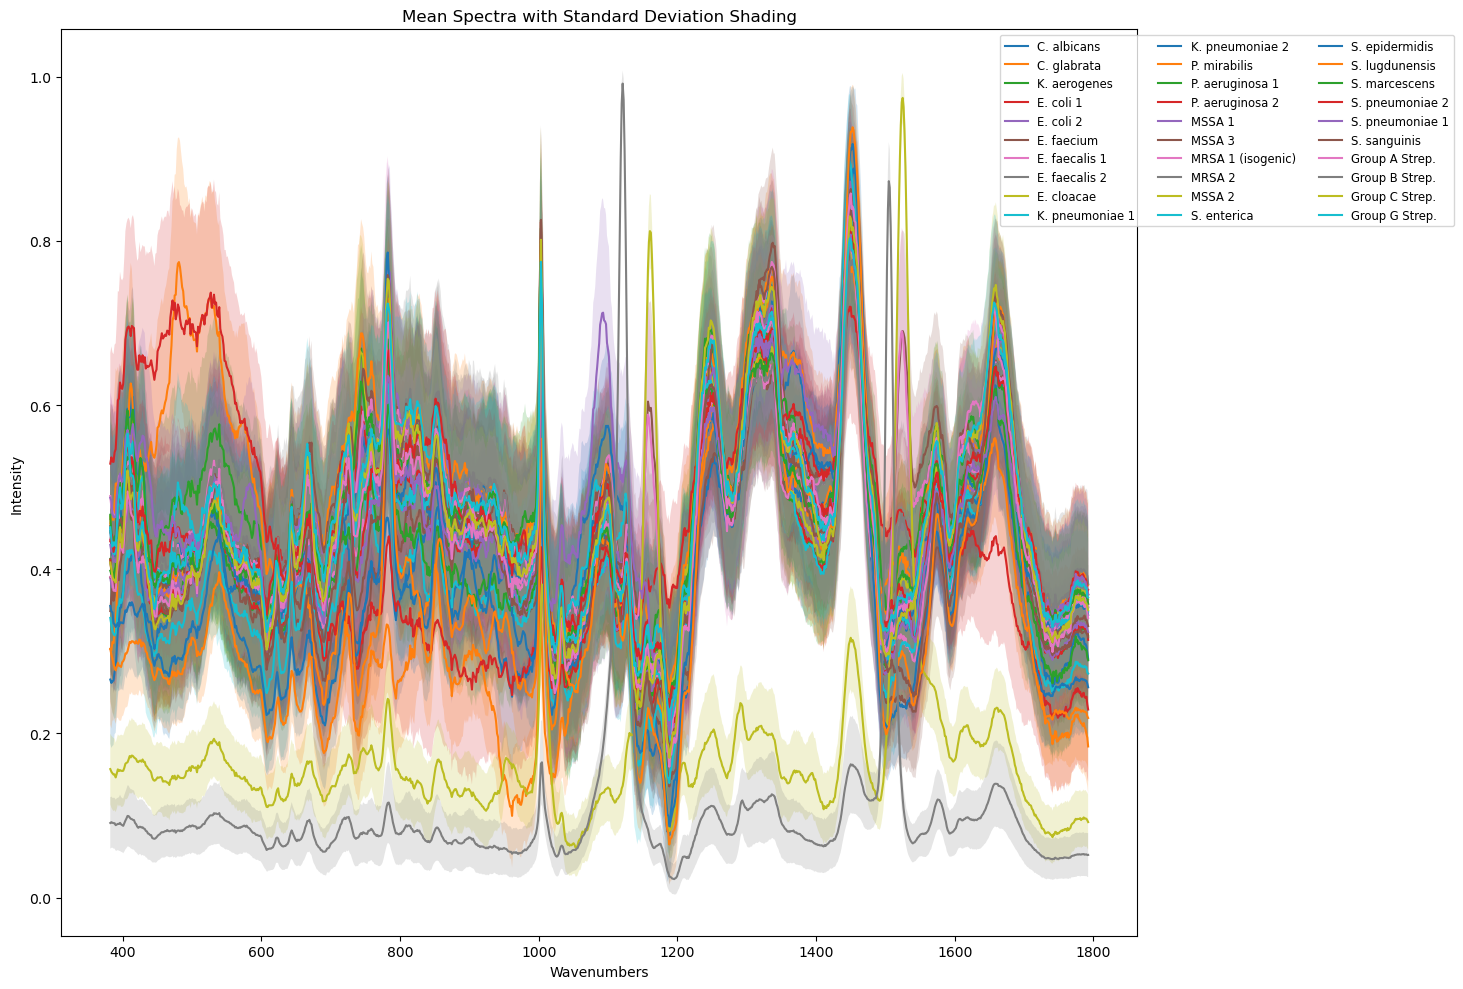

In [31]:
import numpy as np
import matplotlib.pyplot as plt



# Load species labels from config file
from config import STRAINS

# Define the number of species and spectra per species
num_spectra_per_species = 2000
num_species = 30
wavenumbers = np.load('wavenumbers.npy')  # Assuming you have the wavenumbers loaded in a numpy array

# Calculate the mean and standard deviation for each species
mean_spectra = []
std_spectra = []

for i in range(num_species):
    spectra = X[i * num_spectra_per_species:(i + 1) * num_spectra_per_species, :]
    mean_spectrum = np.mean(spectra, axis=0)
    std_spectrum = np.std(spectra, axis=0)
    
    mean_spectra.append(mean_spectrum)
    std_spectra.append(std_spectrum)

# Convert to numpy arrays for easier handling
mean_spectra = np.array(mean_spectra)
std_spectra = np.array(std_spectra)

# Plotting
plt.figure(figsize=(15, 10))

for i in range(num_species):
    plt.plot(wavenumbers, mean_spectra[i], label=STRAINS[i])
    plt.fill_between(wavenumbers, mean_spectra[i] - std_spectra[i], mean_spectra[i] + std_spectra[i], alpha=0.2)

plt.xlabel('Wavenumbers')
plt.ylabel('Intensity')
plt.title('Mean Spectra with Standard Deviation Shading')

# Arrange legend into 3 columns
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), fontsize='small', ncol=3)

plt.tight_layout()
plt.show()


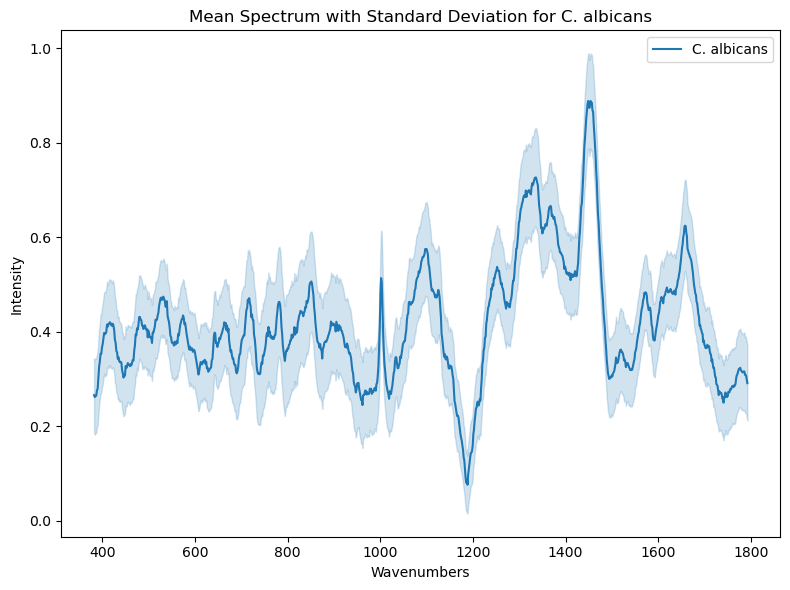

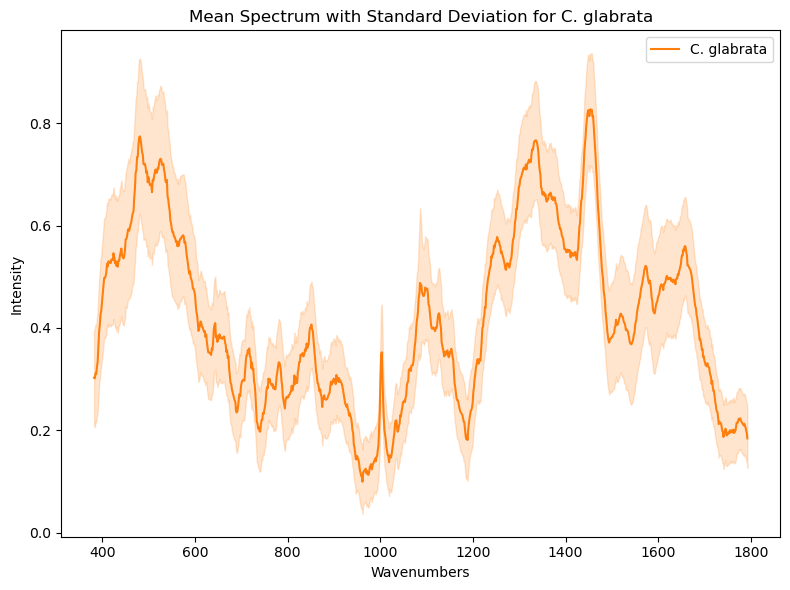

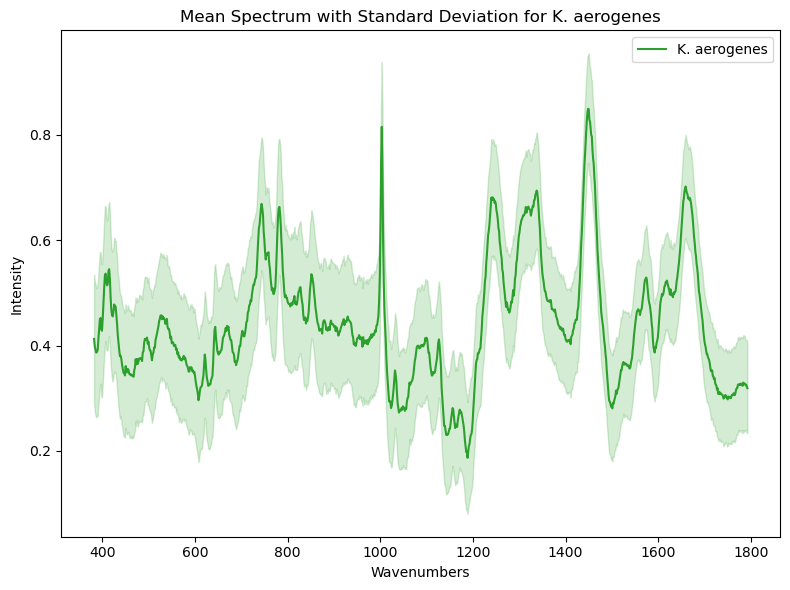

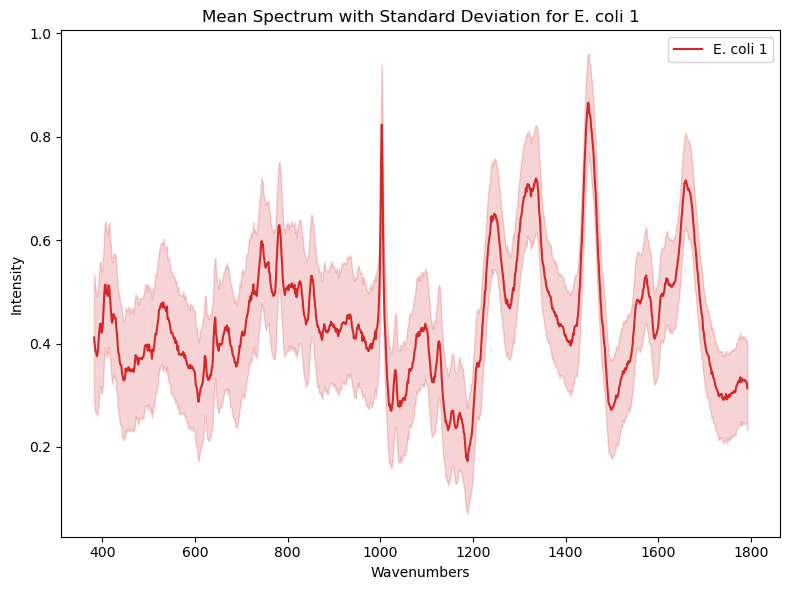

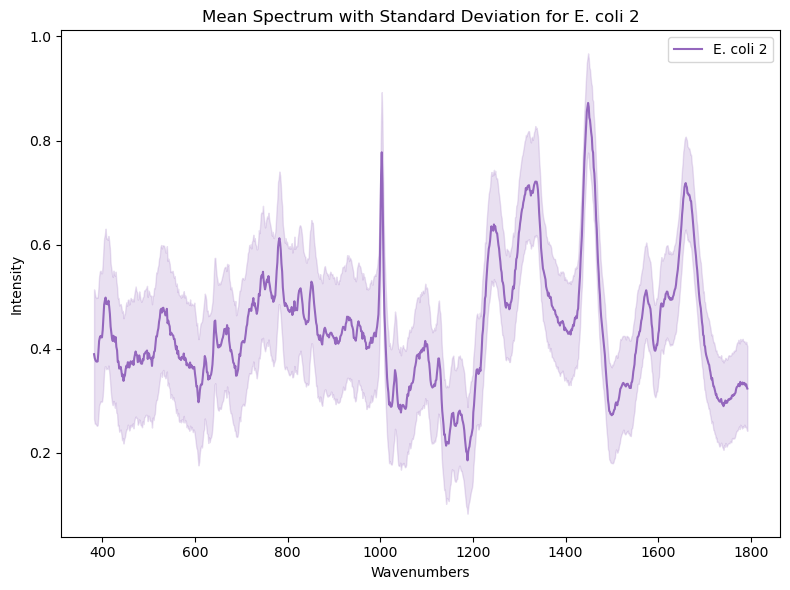

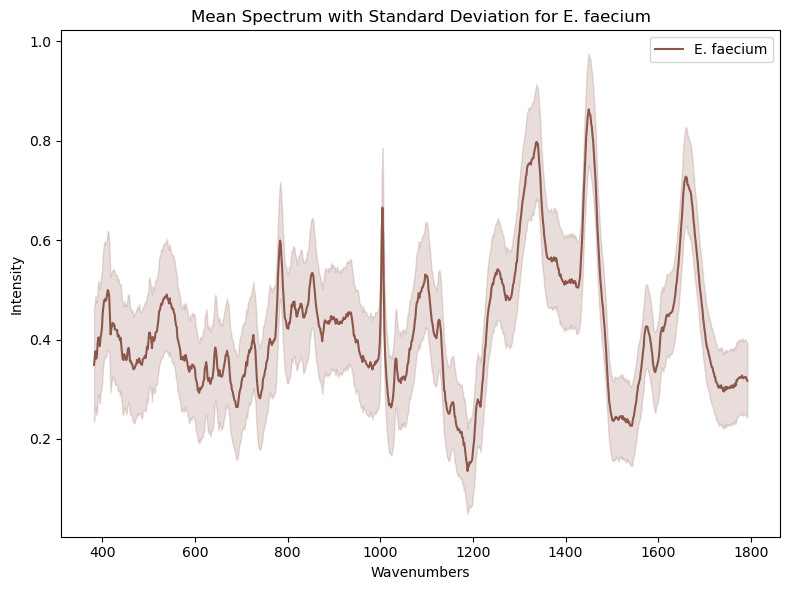

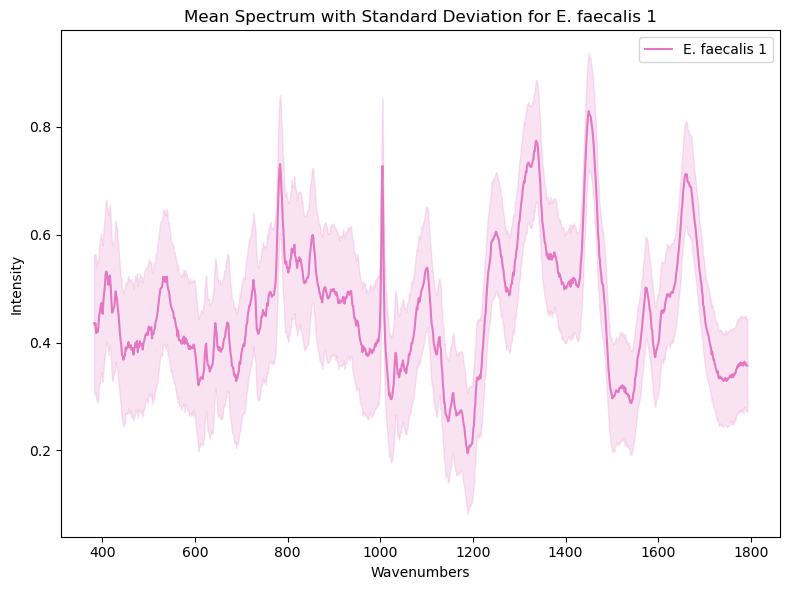

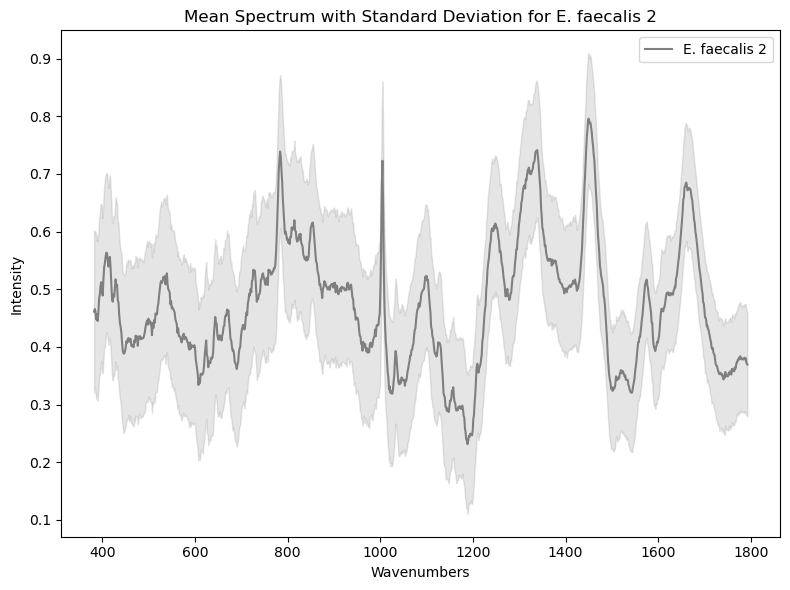

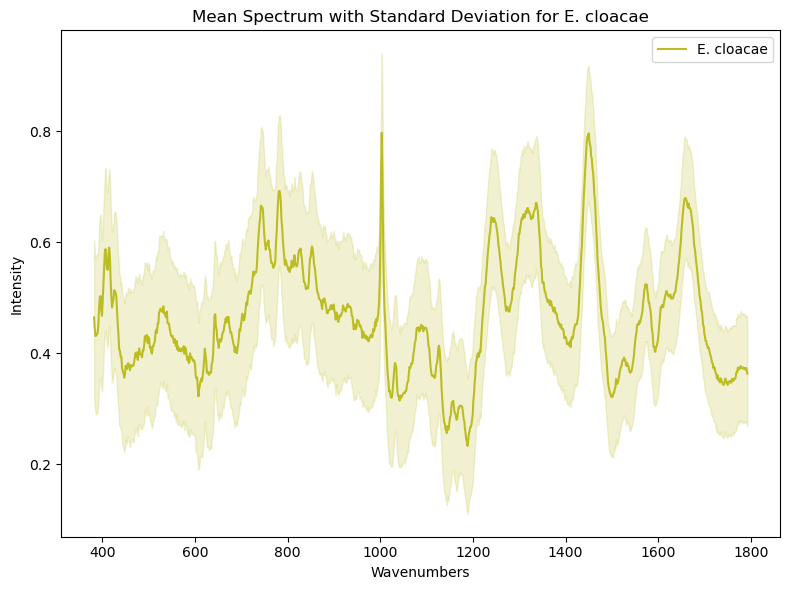

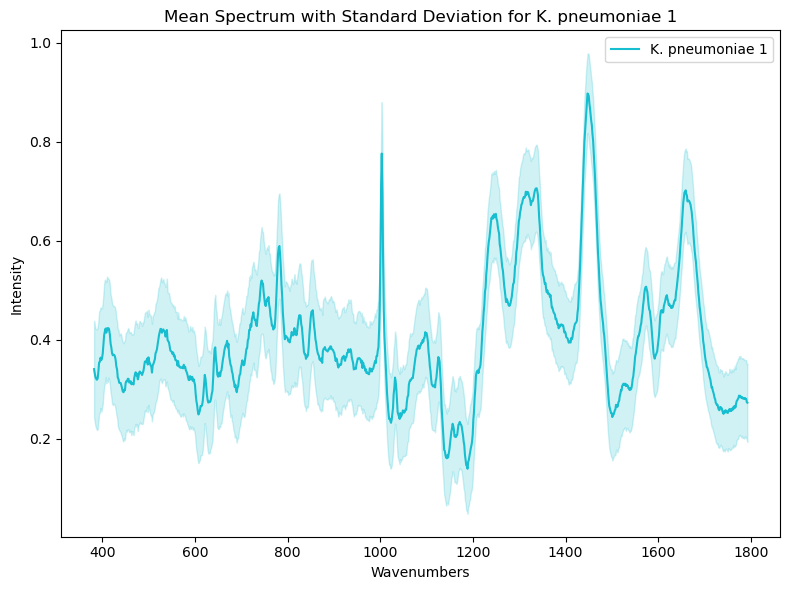

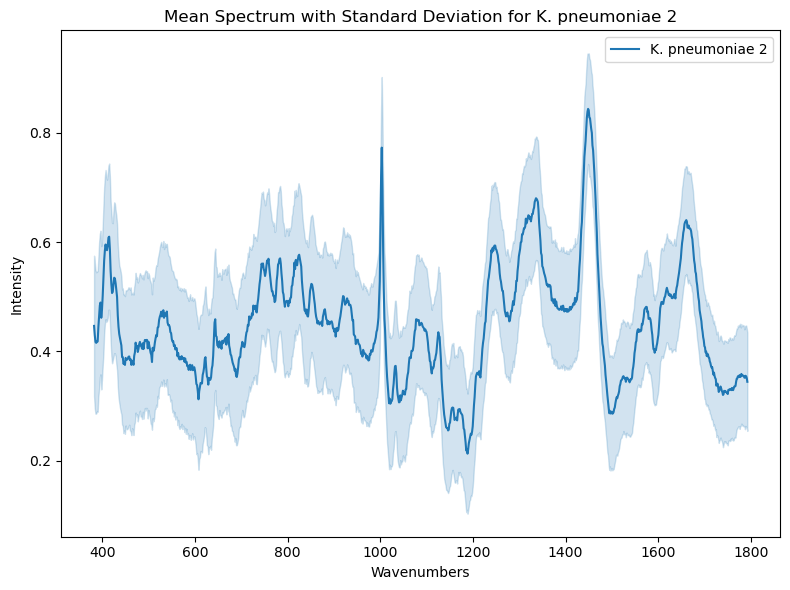

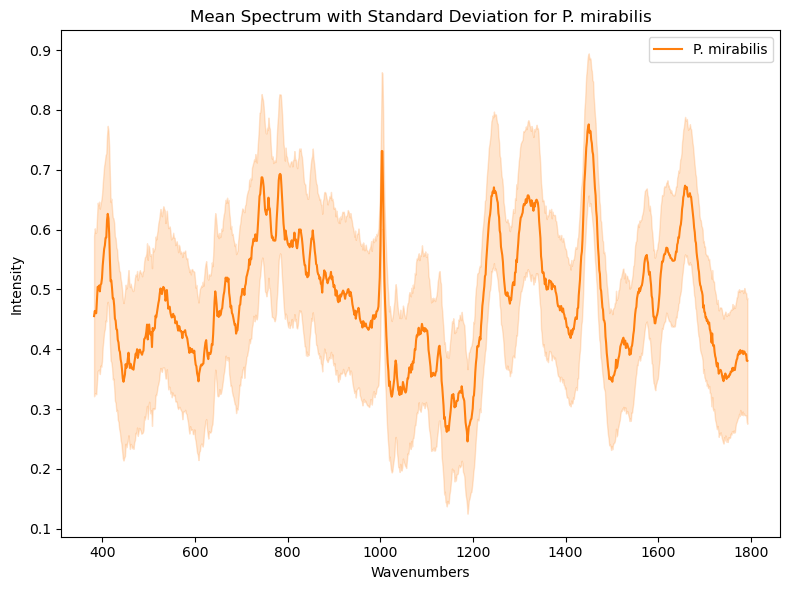

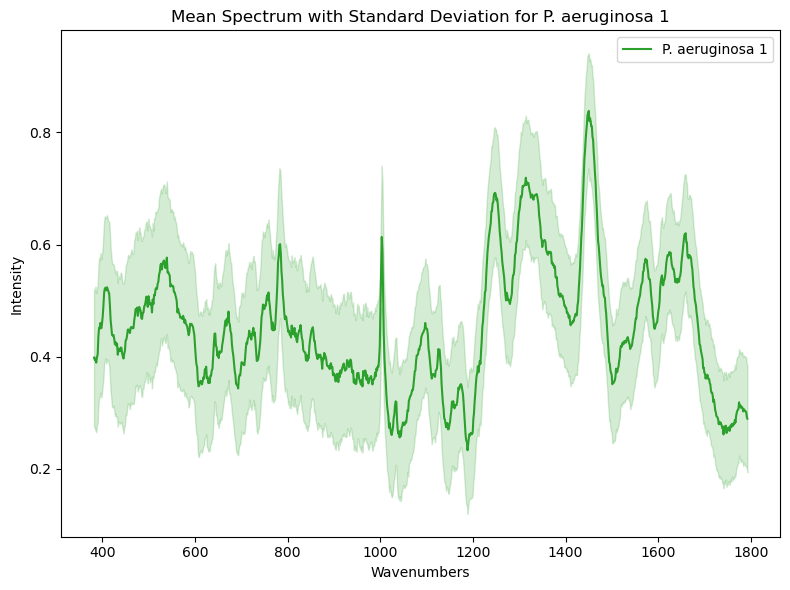

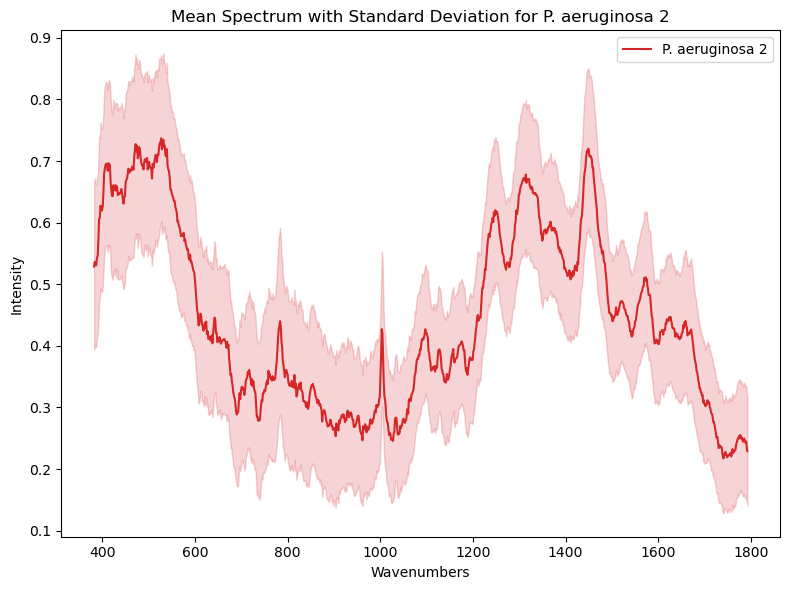

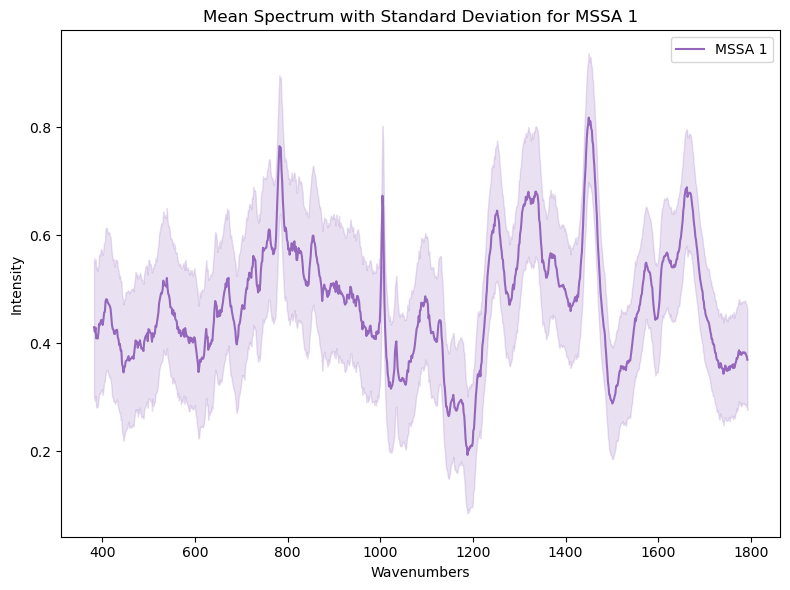

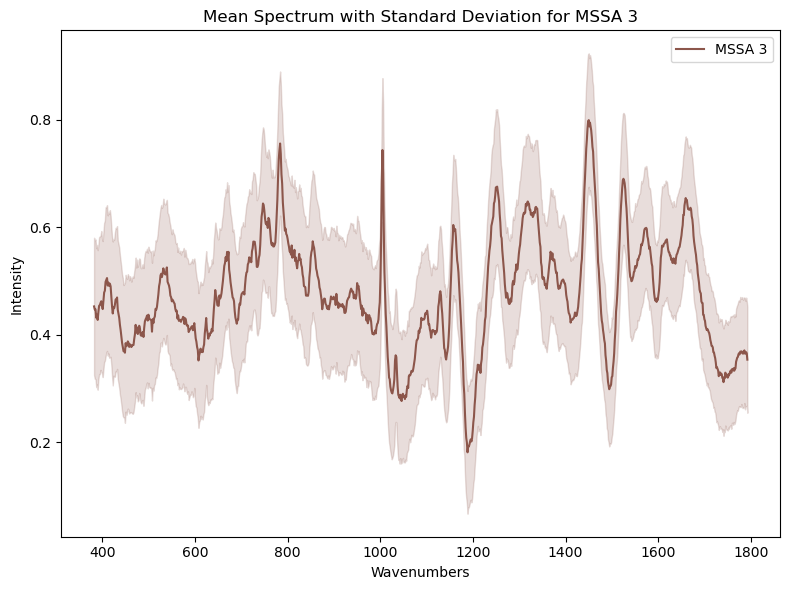

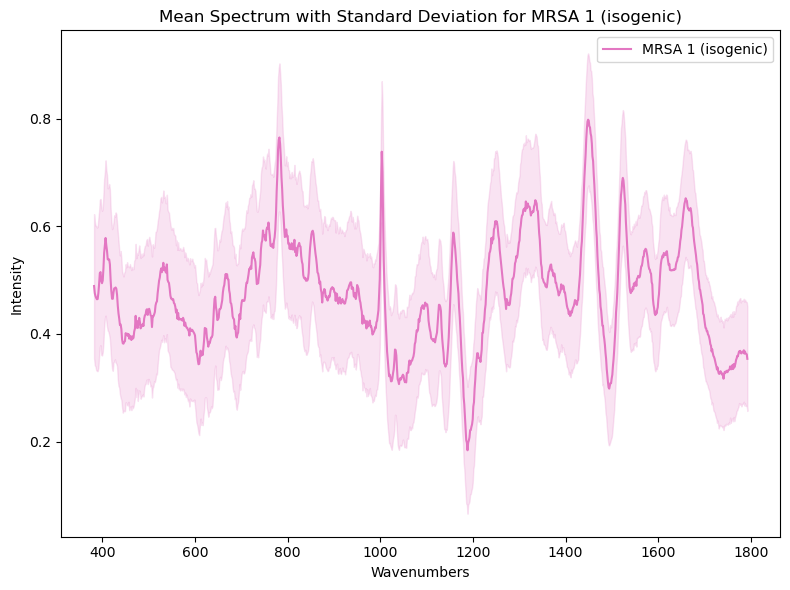

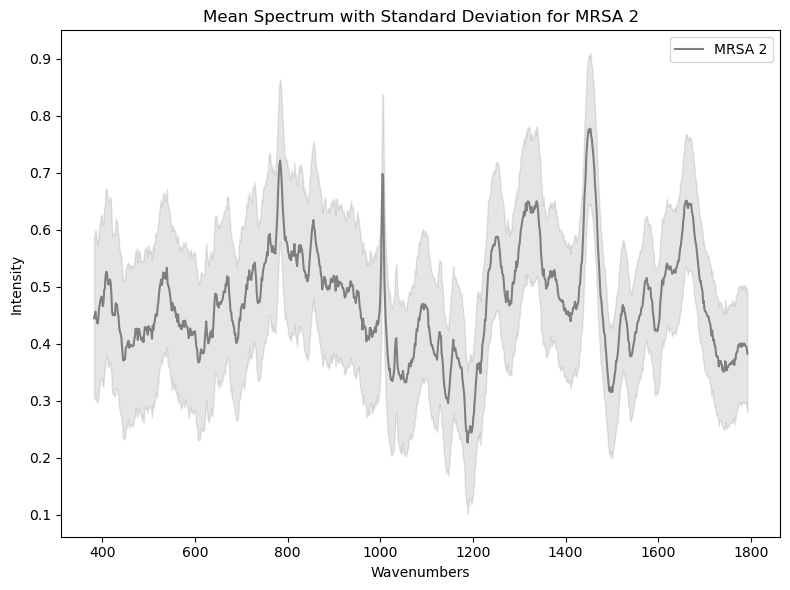

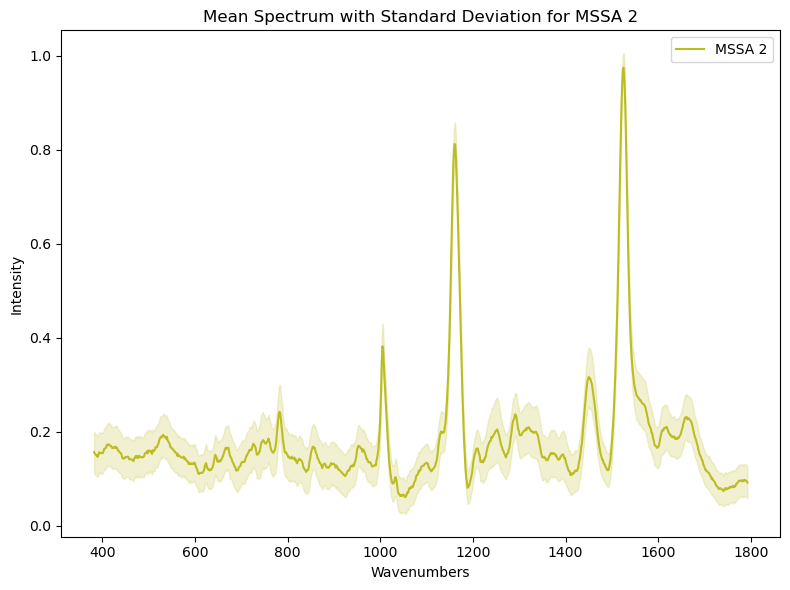

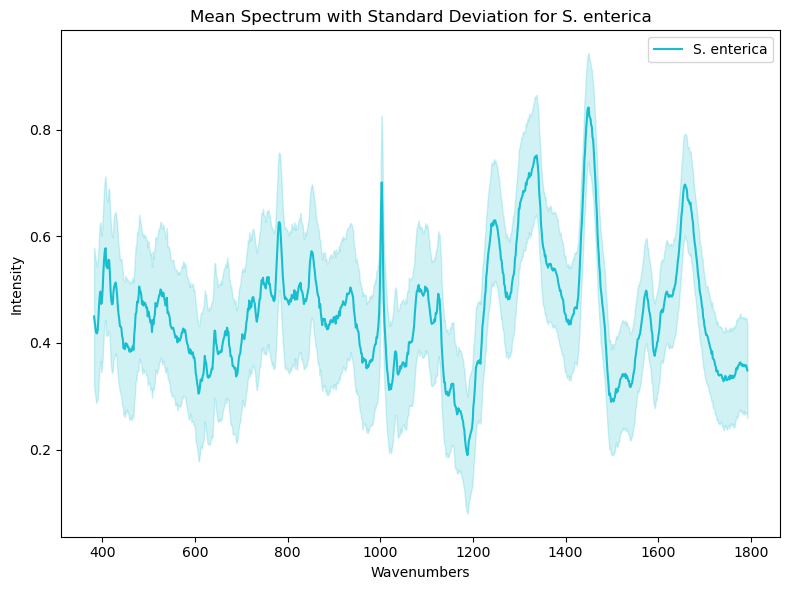

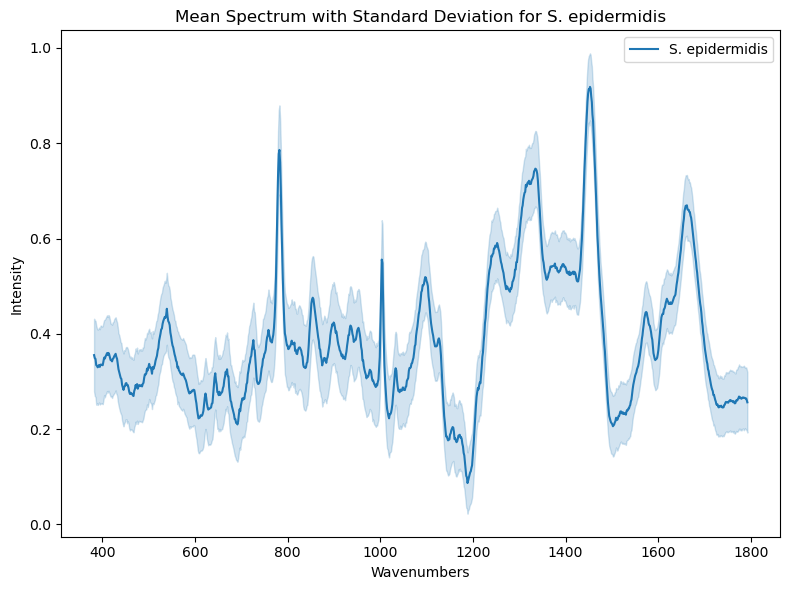

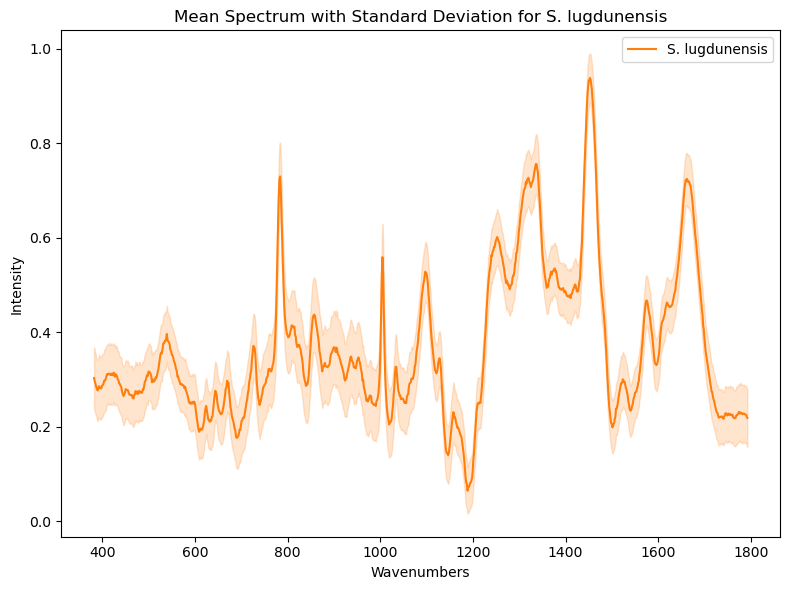

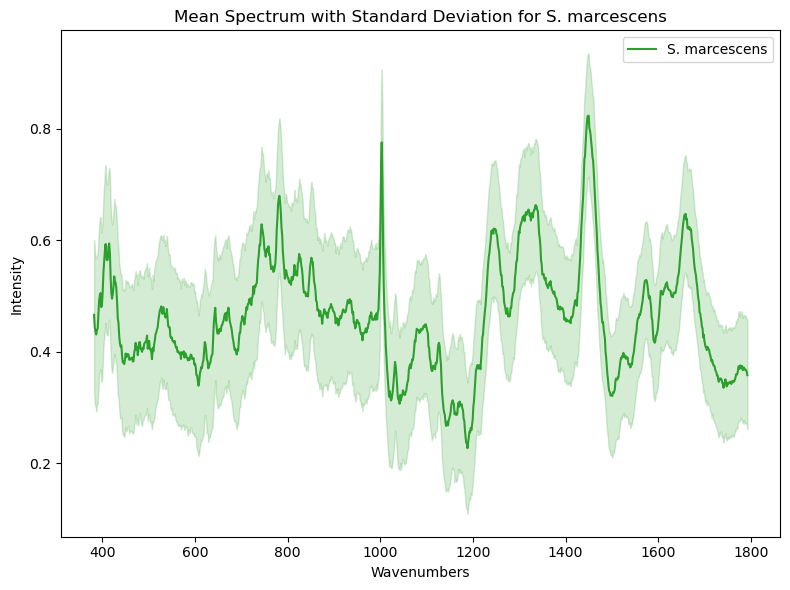

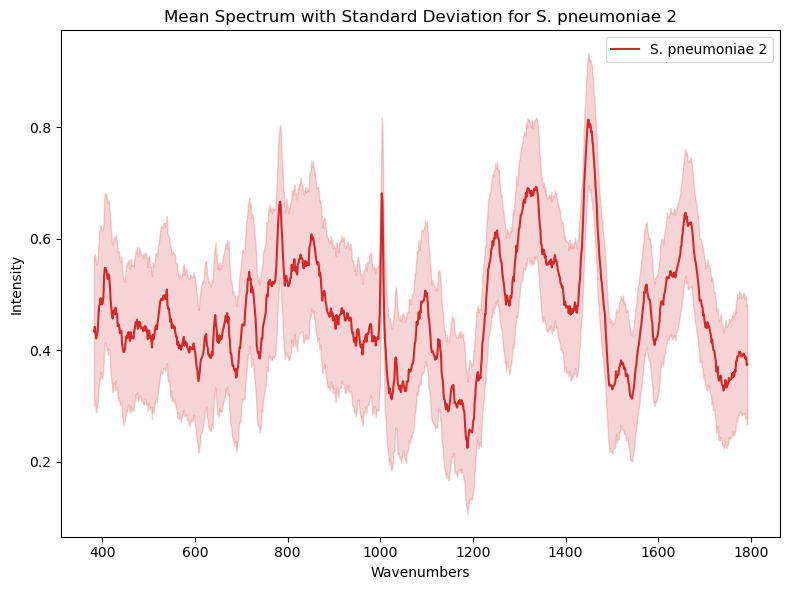

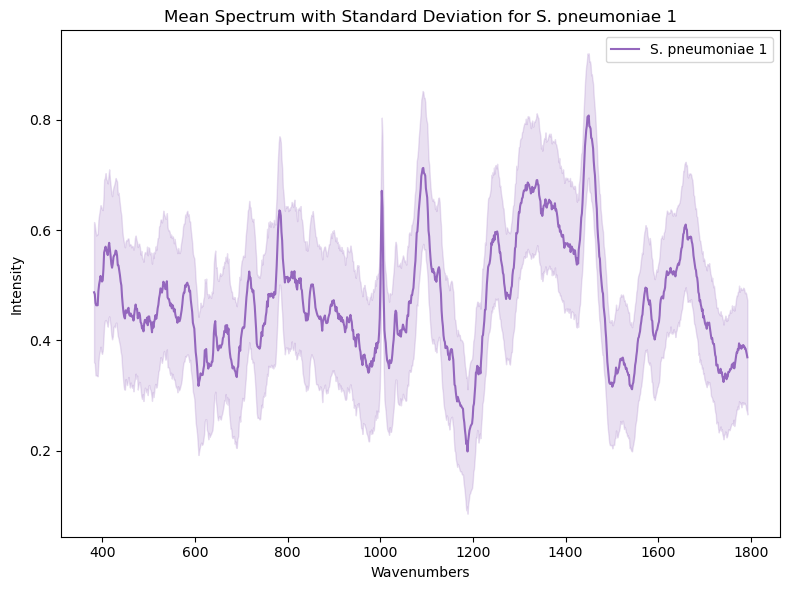

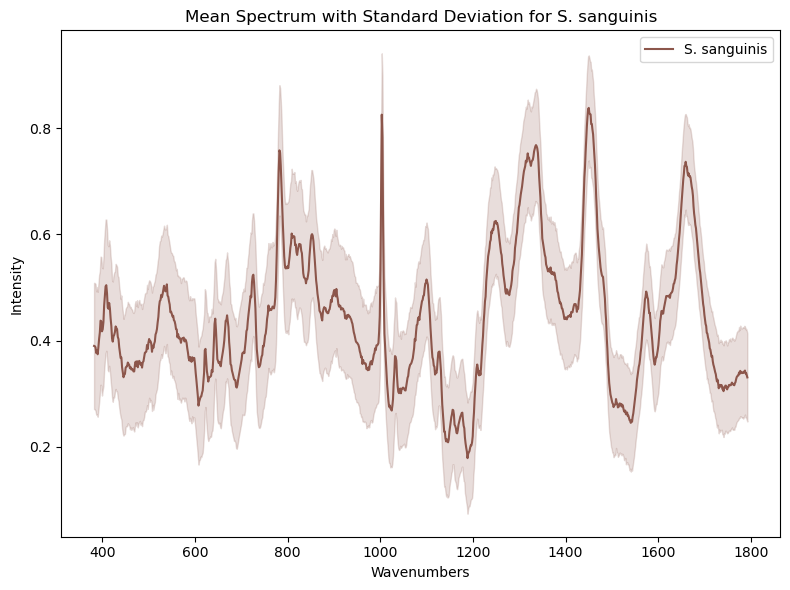

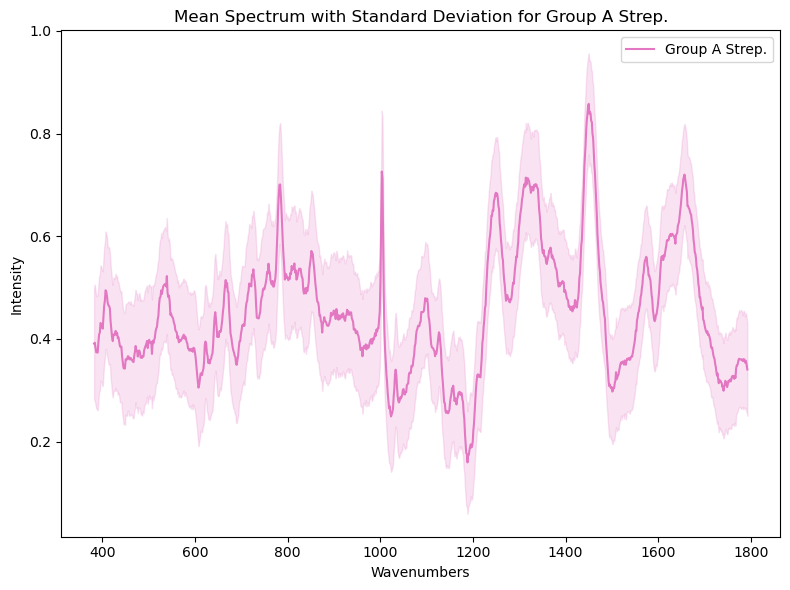

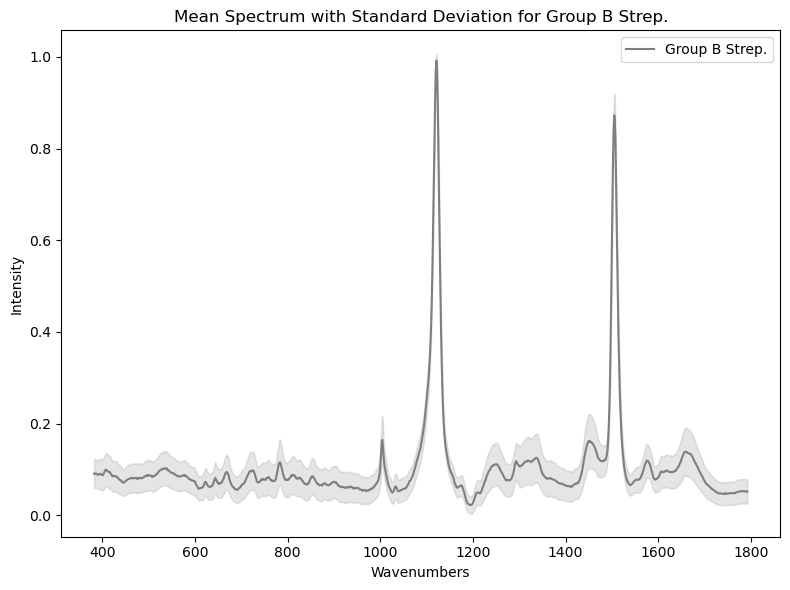

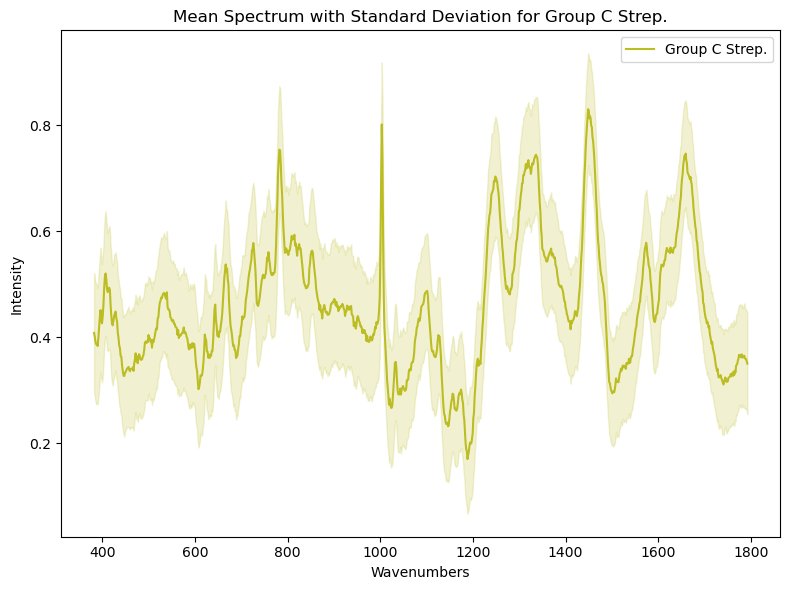

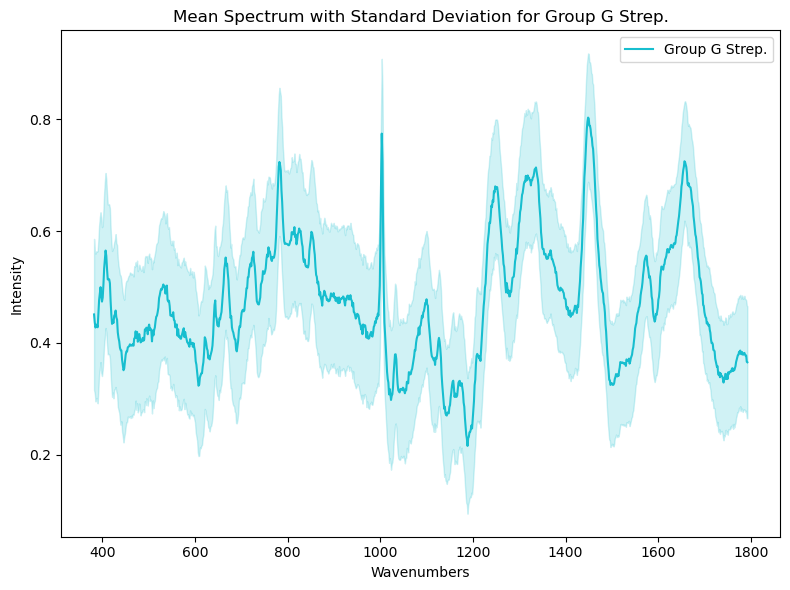

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from config import STRAINS

# Define the number of species and spectra per species
num_spectra_per_species = 2000
num_species = 30
wavenumbers = np.load('wavenumbers.npy')  # Load the wavenumbers

# Calculate the mean and standard deviation for each species
mean_spectra = []
std_spectra = []

for i in range(num_species):
    spectra = X[i * num_spectra_per_species:(i + 1) * num_spectra_per_species, :]
    mean_spectrum = np.mean(spectra, axis=0)
    std_spectrum = np.std(spectra, axis=0)
    
    mean_spectra.append(mean_spectrum)
    std_spectra.append(std_spectrum)

# Convert to numpy arrays for easier handling
mean_spectra = np.array(mean_spectra)
std_spectra = np.array(std_spectra)

# Plotting individual plots for each species
for i in range(num_species):
    plt.figure(figsize=(8, 6))
    
    # Plot the mean spectrum with shading for the standard deviation
    plt.plot(wavenumbers, mean_spectra[i], label=STRAINS[i], color=f'C{i}')
    plt.fill_between(wavenumbers, mean_spectra[i] - std_spectra[i], mean_spectra[i] + std_spectra[i], color=f'C{i}', alpha=0.2)
    
    # Set plot labels and title
    plt.xlabel('Wavenumbers')
    plt.ylabel('Intensity')
    plt.title(f'Mean Spectrum with Standard Deviation for {STRAINS[i]}')
    
    # Add legend
    plt.legend(loc='upper right')
    
    # Show plot
    plt.tight_layout()
    plt.show()
